<a href="https://colab.research.google.com/github/GorkemKocamanoglu/DSA210-Project/blob/main/Codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scraping page 1...
Scraping page 2...
Scraping page 3...
Scraping page 4...
Scraping page 5...
Scraping page 6...
Scraping page 7...
Scraping page 8...
Scraping page 9...
Scraping page 10...
Scraping page 11...
Scraping page 12...
Scraping page 13...
Scraping page 14...
Scraping page 15...
Scraping page 16...
Scraping page 17...
Scraping page 18...
Scraping page 19...
Scraping page 20...
Scraping page 21...
Scraping page 22...
Scraping page 23...
Scraping page 24...
Scraping page 25...
Scraping page 26...
Scraping page 27...
Scraping page 28...
Scraping page 29...
Scraping page 30...
Scraping page 31...
Scraping page 32...
Scraping page 33...
Scraping page 34...
Scraping page 35...
Scraping page 36...
Scraping page 37...
Scraping page 38...
Scraping page 39...
Scraping page 40...
Scraping page 41...
Scraping page 42...
Scraping page 43...
Scraping page 44...
Scraping page 45...
Scraping page 46...
Scraping page 47...
Scraping page 48...
Scraping page 49...
Scraping page 50...
Scraping 

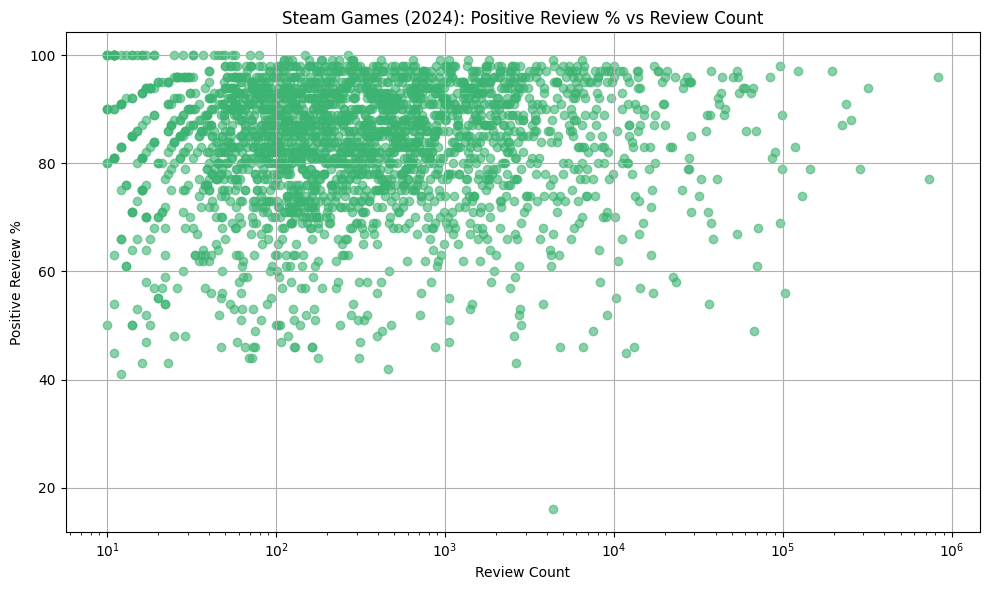

Correlation (Review Count vs Positive %): 0.0162


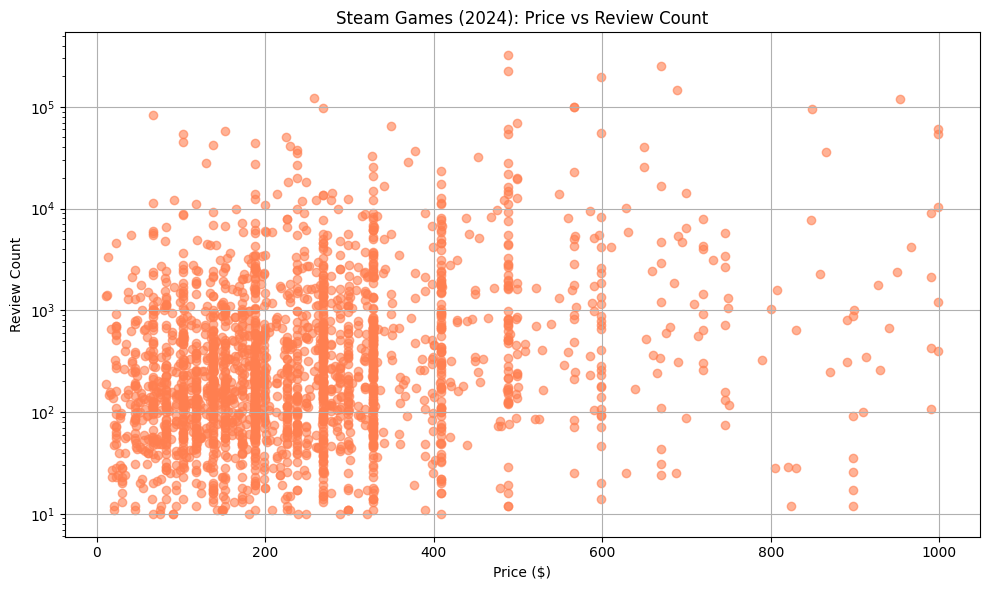

Correlation (Price vs Review Count): 0.1808


In [25]:
#Data Processing
import requests
from bs4 import BeautifulSoup
import time
import matplotlib.pyplot as plt
import re
import numpy as np

# Base URL for Steam store search (only games)
base_url = "https://store.steampowered.com/search/?ignore_preferences=1&category1=998&ndl=1&page={}"
all_games = []

# Scrape first 10 pages
for page in range(1, 500):
    print(f"Scraping page {page}...")
    url = base_url.format(page)
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    games = soup.find_all("a", class_="search_result_row")

    for game in games:
        title_tag = game.find("span", class_="title")
        title = title_tag.text.strip() if title_tag else "Unknown"

        date_tag = game.find("div", class_="search_released")
        release_date = date_tag.text.strip() if date_tag else "Unknown"

        review_tag = game.find("span", class_="search_review_summary")
        review_text = review_tag["data-tooltip-html"] if review_tag and "data-tooltip-html" in review_tag.attrs else "No reviews"

        review_percent = None
        review_count = None
        if "of the" in review_text:
            match = re.search(r"(\d+)% of the ([\d,]+)", review_text)
            if match:
                review_percent = int(match.group(1))
                review_count = int(match.group(2).replace(",", ""))

        price_tag = game.find("div", class_="discount_final_price")
        price = None
        if price_tag:
            price_text = price_tag.text.strip()
            if "Free" in price_text or "Ücretsiz" in price_text:
                price = 0.0
            else:
                price_text = re.sub(r"[^\d,\.]", "", price_text)  # Remove currency symbols
                price_text = price_text.replace(",", ".")
                try:
                    price = float(price_text)
                except ValueError:
                    price = None

        all_games.append({
            "title": title,
            "release_date": release_date,
            "review_percent": review_percent,
            "review_count": review_count,
            "price": price
        })


# Filter games released in 2024 with valid reviews
games_2024 = [
    g for g in all_games
    if "2024" in g["release_date"]
    and g["review_percent"] is not None
    and g["review_count"] is not None
]

print(f"Total 2024 games with reviews: {len(games_2024)}")
#Data Visualization
# -------- Plot 1: Review Count vs Review Percent --------
x = [g["review_count"] for g in games_2024]
y = [g["review_percent"] for g in games_2024]

plt.figure(figsize=(10, 6))
plt.scatter(x, y, alpha=0.6, color="mediumseagreen")
plt.xscale("log")
plt.title("Steam Games (2024): Positive Review % vs Review Count")
plt.xlabel("Review Count")
plt.ylabel("Positive Review %")
plt.grid(True)
plt.tight_layout()
plt.show()

corr = np.corrcoef(x, y)[0, 1]
print(f"Correlation (Review Count vs Positive %): {corr:.4f}")

# -------- Plot 2: Price vs Review Count --------
games_with_price = [g for g in games_2024 if g["price"] is not None and g["price"] > 0]
x_price = [g["price"] for g in games_with_price]
y_reviews = [g["review_count"] for g in games_with_price]

if len(x_price) > 1:
    plt.figure(figsize=(10, 6))
    plt.scatter(x_price, y_reviews, alpha=0.6, color="coral")
    plt.yscale("log")
    plt.title("Steam Games (2024): Price vs Review Count")
    plt.xlabel("Price ($)")
    plt.ylabel("Review Count")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    price_corr = np.corrcoef(x_price, y_reviews)[0, 1]
    print(f"Correlation (Price vs Review Count): {price_corr:.4f}")
else:
    print("Not enough data to plot Price vs Review Count.")


In [27]:
# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import pandas as pd
import numpy as np

# Convert to DataFrame
df = pd.DataFrame(games_2024)

# Drop missing values
df = df.dropna(subset=["price", "review_percent", "review_count"])

# Define features and target
X = df[["price", "review_percent"]]
y = df["review_count"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"\n📈 Linear Regression Performance:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")

print(f"\nModel Coefficients:")
print(f"Price Coef: {model.coef_[0]:.2f}")
print(f"Review % Coef: {model.coef_[1]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")



📈 Linear Regression Performance:
R² Score: -0.0093
RMSE: 10283.74

Model Coefficients:
Price Coef: 11.44
Review % Coef: 50.47
Intercept: -4203.71


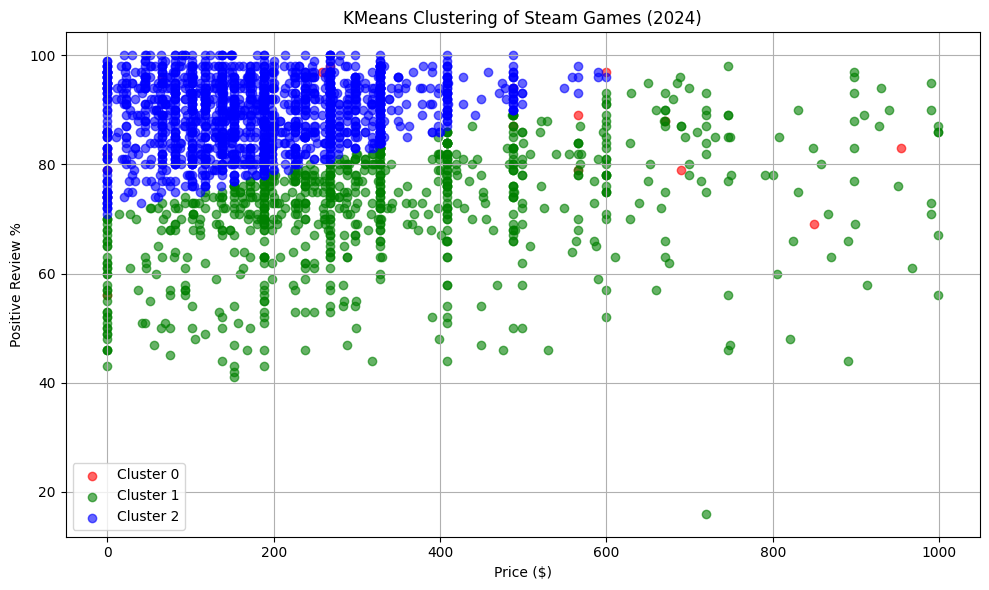

In [28]:
# Kmeans Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Use only rows with full data
df_cluster = df.dropna(subset=["price", "review_percent", "review_count"]).copy()

# Feature matrix
X_cluster = df_cluster[["price", "review_percent", "review_count"]]

# Normalize data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# KMeans clustering (choose 3 clusters for illustration)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster["cluster"] = kmeans.fit_predict(X_scaled)

# Visualize clusters in 2D (using price & review_percent for clarity)
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for i in range(3):
    subset = df_cluster[df_cluster["cluster"] == i]
    plt.scatter(subset["price"], subset["review_percent"],
                label=f"Cluster {i}", alpha=0.6, color=colors[i])

plt.xlabel("Price ($)")
plt.ylabel("Positive Review %")
plt.title("KMeans Clustering of Steam Games (2024)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



📈 Linear Regression with Log-Transformed Target:
R² Score: -0.0321
RMSE: 10399.34
Intercept: 3.82
Coefficients: Price=0.00, Review %=0.02


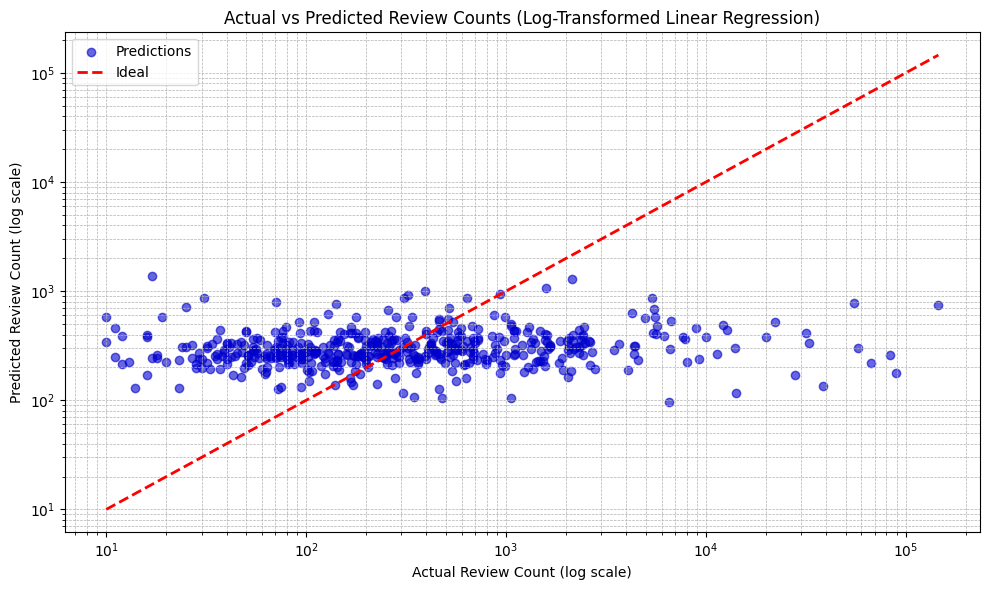

In [34]:
#Linear Regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# ---------------------------
# Step 1: Prepare and clean the data
# ---------------------------

# Assume games_2024 is already defined (from your scraper)
df = pd.DataFrame(games_2024)

# Clean numeric values
def clean_price(x):
    try:
        x = str(x).replace(",", ".")
        x = re.sub(r"[^\d\.]", "", x)
        return float(x) if x else None
    except:
        return None

def clean_count(x):
    try:
        return int(str(x).replace(",", "").strip())
    except:
        return None

def clean_percent(x):
    try:
        return int(str(x).replace("%", "").strip())
    except:
        return None

df["price"] = df["price"].apply(clean_price)
df["review_percent"] = df["review_percent"].apply(clean_percent)
df["review_count"] = df["review_count"].apply(clean_count)

# Drop rows with missing values
df = df.dropna(subset=["price", "review_percent", "review_count"]).copy()

# ---------------------------
# Step 2: Log-transform the target
# ---------------------------

X = df[["price", "review_percent"]]
y = df["review_count"]
y_log = np.log1p(y)  # log(1 + x) to avoid log(0)

# ---------------------------
# Step 3: Train the model
# ---------------------------

X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train_log)

# Predict
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # reverse the log transform
y_test = np.expm1(y_test_log)

# ---------------------------
# Step 4: Evaluate the model
# ---------------------------

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"\n📈 Linear Regression with Log-Transformed Target:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficients: Price={model.coef_[0]:.2f}, Review %={model.coef_[1]:.2f}")

# ---------------------------
# Step 5: Visualize predictions
# ---------------------------

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color="mediumblue", label="Predictions")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2, label="Ideal")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Actual Review Count (log scale)")
plt.ylabel("Predicted Review Count (log scale)")
plt.title("Actual vs Predicted Review Counts (Log-Transformed Linear Regression)")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()
